In [1]:
import numpy as np
from keras import models, layers
from keras import optimizers, losses, metrics, regularizers
from keras.datasets import imdb
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(trainx, trainy), (testx, testy) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequence, dimension=10000):
  result = np.zeros((len(sequence), dimension))
  for i, j in enumerate(sequence):
    result[i, j] = 1
  
  return result

In [4]:
trainx = vectorize_sequences(trainx)
testx = vectorize_sequences(testx)

In [5]:
trainy = np.asarray(trainy).astype('float32')
testy = np.asarray(testy).astype('float32')

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(1e-4), activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(1e-4), activation='relu'))
model.add(layers.Dense(1, kernel_regularizer=regularizers.l2(1e-4), activation='sigmoid'))

In [7]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [8]:
valx = trainx[-10000:]
valy = trainy[-10000:]

trainx = trainx[:-10000]
trainy = trainy[:-10000]

In [ ]:
history = model.fit(trainx, trainy, epochs=20, batch_size=512, validation_data=(valx, valy))

In [10]:
history_dict = history.history

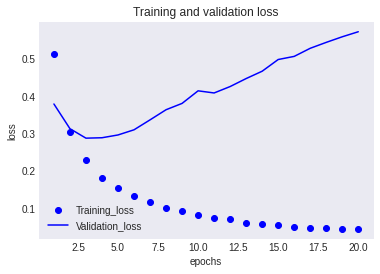

In [11]:
plt.style.use('seaborn-dark')

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss, 'bo', label='Training_loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

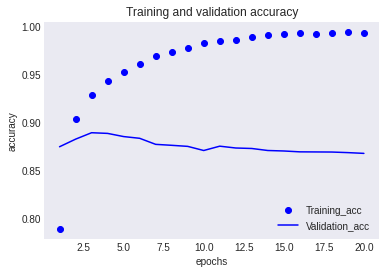

In [12]:
plt.clf()

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

epochs = range(1, 21)

plt.plot(epochs, acc, 'bo', label='Training_acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [13]:
results = model.evaluate(testx, testy)
print(results)

25000/25000 [==============================] - 3s 103us/step
[0.6119472589921952, 0.8557999730110168]


In [14]:
predictions = model.predict(testx)
print(predictions)

[[8.6008728e-02]
 [1.0000000e+00]
 [2.2768974e-04]
 ...
 [1.5880430e-01]
 [3.8745701e-03]
 [5.9630781e-02]]
